In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [7]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
data.shape

(1599, 12)

In [11]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([  8.,  27.,  90., 250., 485., 450., 185.,  74.,  19.,  11.]),
 array([0.99007 , 0.991432, 0.992794, 0.994156, 0.995518, 0.99688 ,
        0.998242, 0.999604, 1.000966, 1.002328, 1.00369 ]),
 <BarContainer object of 10 artists>)

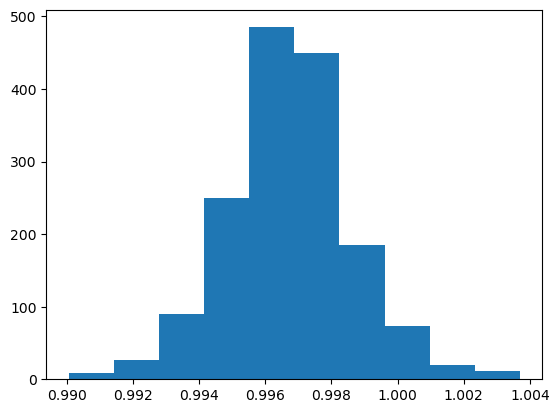

In [17]:
plt.hist(data.density)

In [92]:
X = data.drop('quality', axis=1)  
y = data['quality']  
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=30)

print(f"Dimensiones del  entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Dimensiones del  prueba: {X_test.shape}, {y_test.shape}")

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



Dimensiones del  entrenamiento: (1439, 11), (1439,)
Dimensiones del  prueba: (160, 11), (160,)


In [38]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor puntuación: 0.6157278358497871


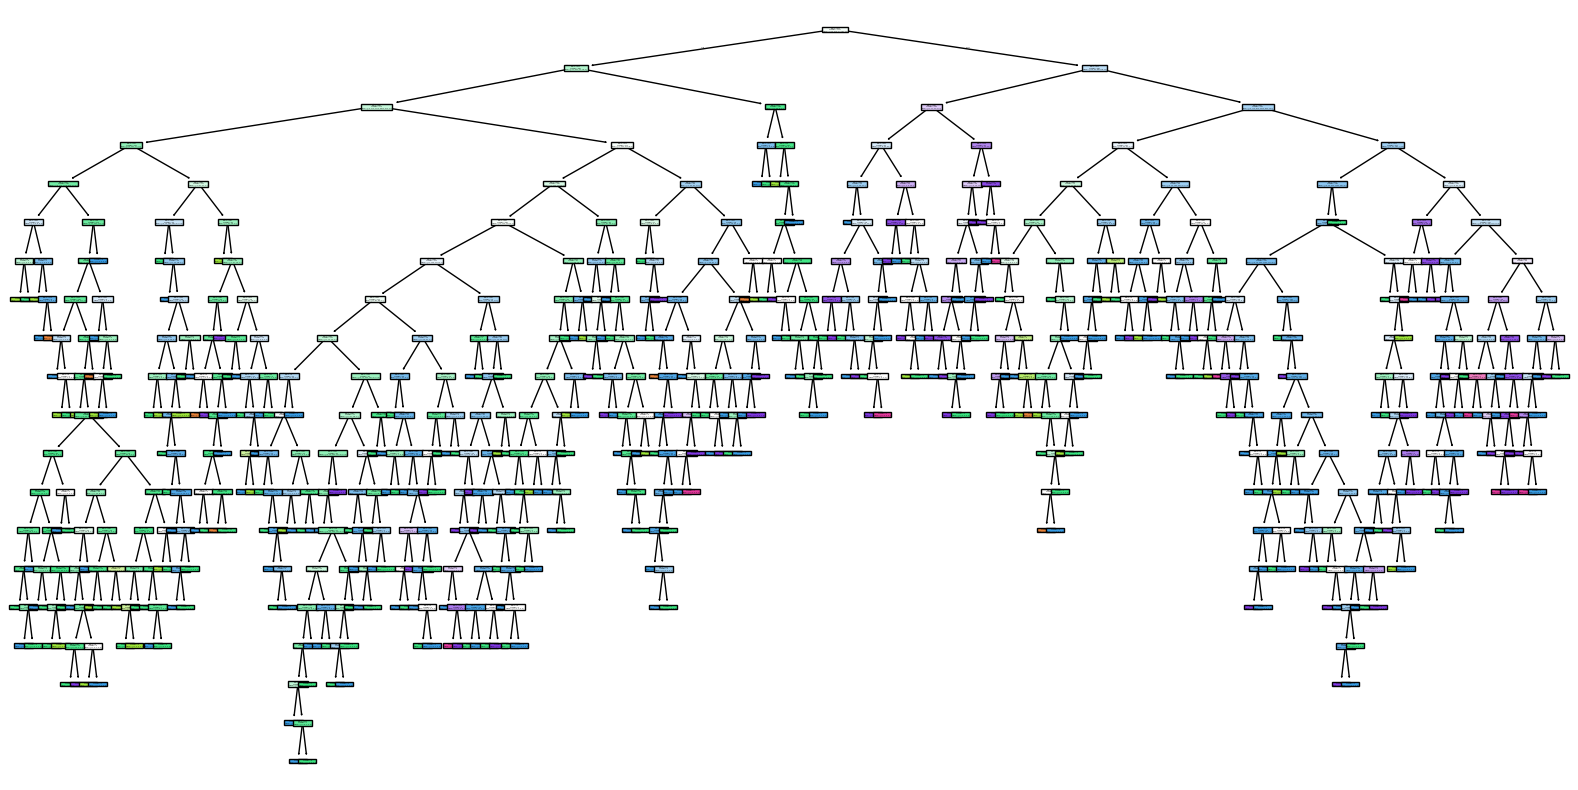

In [42]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(grid_search.best_estimator_, filled=True, feature_names=X_train.columns)
plt.show()

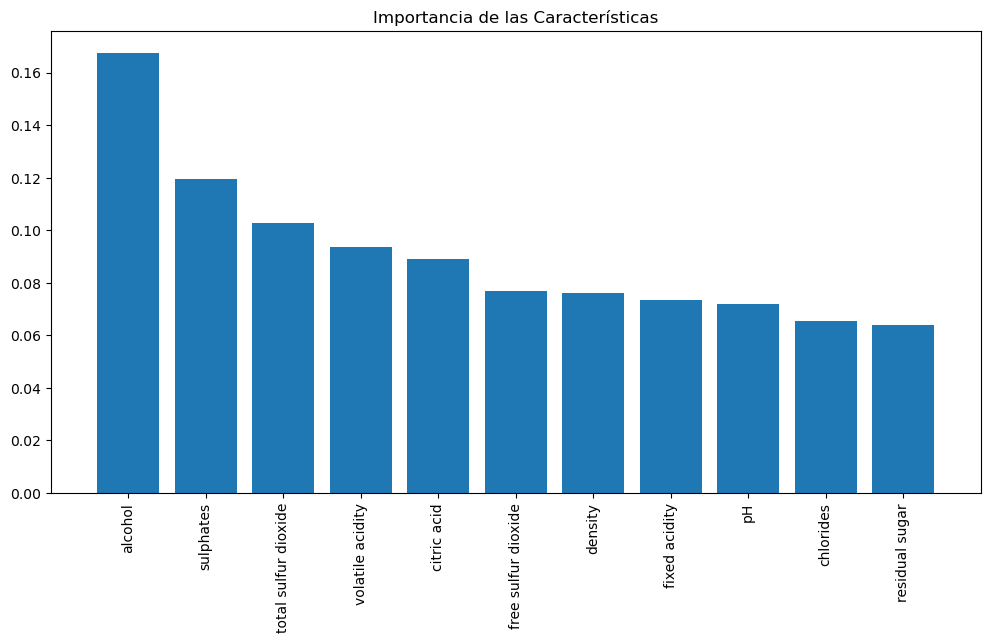

In [58]:
import matplotlib.pyplot as plt
import numpy as np
importancia = model.feature_importances_
caracteristicas = X_train.columns
indices = np.argsort(importancia)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Importancia de las Características")
plt.bar(range(X_train.shape[1]), importancia[indices], align="center")
plt.xticks(range(X_train.shape[1]), caracteristicas[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [88]:
from sklearn.tree import DecisionTreeClassifier
model_podado = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
model_podado.fit(X_train, y_train)
y_pred_podado = model_podado.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

print("Matriz de confusión :\n", confusion_matrix(y_test, y_pred_podado))
print("\nReporte de clasificación :\n", classification_report(y_test, y_pred_podado))

Matriz de confusión :
 [[ 0  0  1  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0 58 10  0  0]
 [ 0  0 36 28  2  0]
 [ 0  0  2 16  0  0]
 [ 0  0  0  3  1  0]]

Reporte de clasificación :
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.58      0.85      0.69        68
           6       0.49      0.42      0.46        66
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00         4

    accuracy                           0.54       160
   macro avg       0.18      0.21      0.19       160
weighted avg       0.45      0.54      0.48       160



C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
